# 圖像基礎

導入相應的包：

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

![臭蟲](stinkbug.png)

## 導入圖像

我們首先導入上面的圖像，注意 `matplotlib` 預設只支持 `PNG` 格式的圖像，我們可以使用 `mpimg.imread` 方法讀入這幅圖像：

In [2]:
img = mpimg.imread('stinkbug.png')

In [3]:
img.shape

(375L, 500L, 3L)

這是一個 `375 x 500 x 3` 的 `RGB` 圖像，並且每個像素使用 uint8 分別表示 `RGB` 三個通道的值。不過在處理的時候，`matplotlib` 將它們的值歸一化到 `0.0~1.0` 之間：

In [4]:
img.dtype

dtype('float32')

## 顯示圖像

使用 `plt.imshow()` 可以顯示圖像：

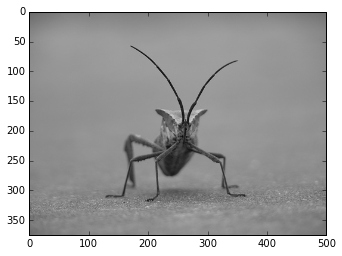

In [5]:
imgplot = plt.imshow(img)

## 偽彩色圖像

從單通道模擬彩色圖像：

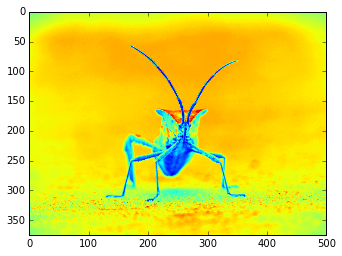

In [6]:
lum_img = img[:,:,0]
imgplot = plt.imshow(lum_img)

## 改變 colormap

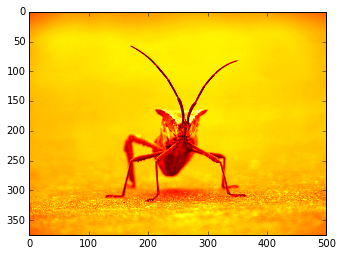

In [7]:
imgplot = plt.imshow(lum_img)
imgplot.set_cmap('hot')

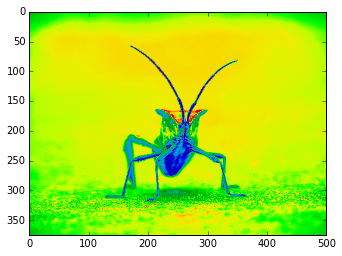

In [8]:
imgplot = plt.imshow(lum_img)
imgplot.set_cmap('spectral')

顯示色度條：

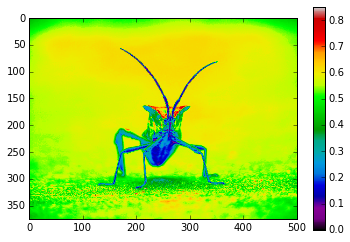

In [9]:
imgplot = plt.imshow(lum_img)
imgplot.set_cmap('spectral')
plt.colorbar()
plt.show()

## 限制顯示範圍

先查看直方圖：

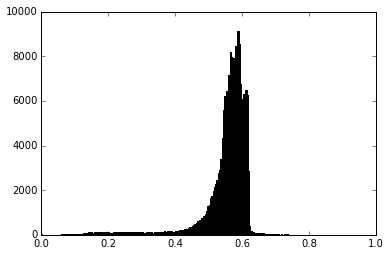

In [10]:
plt.hist(lum_img.flatten(), 256, range=(0.0,1.0), fc='k', ec='k')
plt.show()

將顯示範圍設為 `0.0-0.7`：

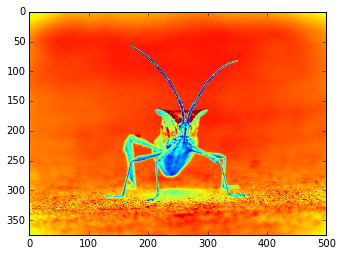

In [11]:
imgplot = plt.imshow(lum_img)
imgplot.set_clim(0.0,0.7)

## resize 操作

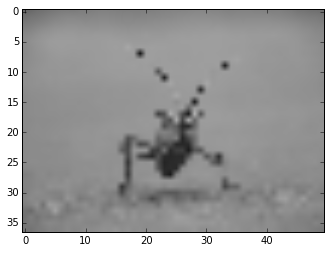

In [12]:
from PIL import Image
img = Image.open('stinkbug.png')
rsize = img.resize((img.size[0]/10,img.size[1]/10))
rsizeArr = np.asarray(rsize) 
imgplot = plt.imshow(rsizeArr)

上面我們將這個圖像使用 PIL 的 `Image` 對象導入，並將其 `resize` 為原來的 1/100，可以看到很多細節都丟失了。

在畫圖時，由於畫面的大小與實際像素的大小可能不一致，所以不一致的地方會進行插值處理，嘗試一下不同的插值方法：

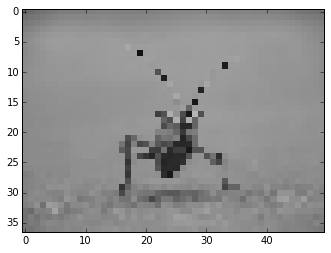

In [13]:
imgplot = plt.imshow(rsizeArr)
imgplot.set_interpolation('nearest')

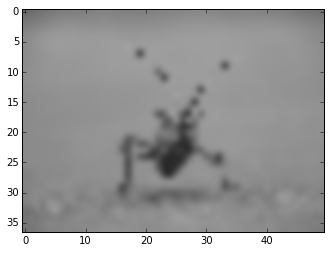

In [14]:
imgplot = plt.imshow(rsizeArr)
imgplot.set_interpolation('bicubic')